In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/data/credit-default.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
default                 1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
jo

In [4]:
df.default.value_counts()

1    700
2    300
Name: default, dtype: int64

In [9]:
from sklearn import *

target = "default"
X = df.drop(columns=target)
y = preprocessing.LabelEncoder().fit_transform(df[target])

cat_columns = [c  for c in X.dtypes.index if str(X.dtypes[c]) == "object"]
num_columns = [c  for c in X.dtypes.index if str(X.dtypes[c]) != "object"]

# Build pipelines for categorical data and numeric data
cat_pipe = pipeline.Pipeline([
    ('imputer', impute.SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', preprocessing.OneHotEncoder(handle_unknown='ignore'))
]) 

num_pipe = pipeline.Pipeline([
    ('imputer', impute.SimpleImputer(strategy='median')),
    ('poly', preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ('scaler', preprocessing.StandardScaler()),
])

preprocessing_pipe = compose.ColumnTransformer([
    ("cat", cat_pipe, cat_columns),
    ("num", num_pipe, num_columns)
])


# Build estimator pipeline
estimator_pipe = pipeline.Pipeline([
    ("preprocessing", preprocessing_pipe),
    ("est", linear_model.LogisticRegression(solver = "liblinear"))
])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                                        , test_size = 0.3, random_state = 1)

estimator_pipe.fit(X_train, y_train)

y_train_ped = estimator_pipe.predict(X_train)
y_test_ped = estimator_pipe.predict(X_test)




In [10]:
y_test_ped

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [11]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [12]:
metrics.confusion_matrix(y_test, y_test_ped)

array([[190,  24],
       [ 46,  40]])

In [13]:
d = pd.DataFrame({"t": y_test, "p": y_test_ped})

In [17]:
d.query("t == 0 and p == 0").shape

(190, 2)

In [18]:
d.query("t == 0 and p == 1").shape

(24, 2)

In [19]:
(190 + 40)/len(y_test)

0.7666666666666667

In [22]:
pd.Series(y_train).value_counts()/len(y_train)

0    0.694286
1    0.305714
dtype: float64

In [23]:
pd.Series(y_test).value_counts()/len(y_test)

0    0.713333
1    0.286667
dtype: float64

In [24]:
y_test_prob = estimator_pipe.predict_proba(X_test)

In [26]:
y_test_prob.shape

(300, 2)

In [27]:
y_test_prob

array([[0.65351713, 0.34648287],
       [0.06097811, 0.93902189],
       [0.81642663, 0.18357337],
       [0.39353958, 0.60646042],
       [0.17158264, 0.82841736],
       [0.36796326, 0.63203674],
       [0.5610635 , 0.4389365 ],
       [0.74139498, 0.25860502],
       [0.92799144, 0.07200856],
       [0.79843801, 0.20156199],
       [0.18476382, 0.81523618],
       [0.52281215, 0.47718785],
       [0.89361913, 0.10638087],
       [0.94889492, 0.05110508],
       [0.64750958, 0.35249042],
       [0.59754388, 0.40245612],
       [0.97150279, 0.02849721],
       [0.91557997, 0.08442003],
       [0.95570882, 0.04429118],
       [0.15637245, 0.84362755],
       [0.82060285, 0.17939715],
       [0.33302262, 0.66697738],
       [0.91623098, 0.08376902],
       [0.91116786, 0.08883214],
       [0.82722262, 0.17277738],
       [0.86098428, 0.13901572],
       [0.85439517, 0.14560483],
       [0.79148213, 0.20851787],
       [0.90674297, 0.09325703],
       [0.09243402, 0.90756598],
       [0.

In [28]:
y_test_prob = estimator_pipe.predict_proba(X_test)[:,1]
y_test_prob

array([0.34648287, 0.93902189, 0.18357337, 0.60646042, 0.82841736,
       0.63203674, 0.4389365 , 0.25860502, 0.07200856, 0.20156199,
       0.81523618, 0.47718785, 0.10638087, 0.05110508, 0.35249042,
       0.40245612, 0.02849721, 0.08442003, 0.04429118, 0.84362755,
       0.17939715, 0.66697738, 0.08376902, 0.08883214, 0.17277738,
       0.13901572, 0.14560483, 0.20851787, 0.09325703, 0.90756598,
       0.38017485, 0.03454746, 0.46520781, 0.25619473, 0.30777353,
       0.87963747, 0.22926573, 0.53057421, 0.13095178, 0.09170054,
       0.10337288, 0.51096687, 0.01114864, 0.49609412, 0.06736375,
       0.03604728, 0.11205905, 0.25482895, 0.06554089, 0.10566308,
       0.2222633 , 0.45127955, 0.59194052, 0.50366763, 0.25475541,
       0.15772444, 0.57554726, 0.63685245, 0.03113128, 0.58484536,
       0.4019849 , 0.07713636, 0.49477982, 0.01899767, 0.54229695,
       0.28711958, 0.19391725, 0.04878268, 0.85493258, 0.91308321,
       0.16026921, 0.22701397, 0.03343544, 0.50467395, 0.16823

In [30]:
import numpy as np

In [35]:
y_test_pred = np.where(y_test_prob>0.5, 1, 0)
metrics.confusion_matrix(y_test, y_test_pred)

array([[190,  24],
       [ 46,  40]])

In [36]:
y_test_pred = np.where(y_test_prob>0.8, 1, 0)
metrics.confusion_matrix(y_test, y_test_pred)

array([[211,   3],
       [ 71,  15]])

In [37]:
y_test_pred = np.where(y_test_prob>0.2, 1, 0)
metrics.confusion_matrix(y_test, y_test_pred)

array([[129,  85],
       [ 21,  65]])

In [45]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)

In [46]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'TPR')

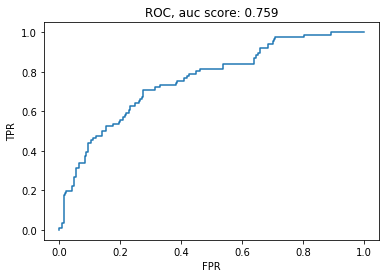

In [50]:
plt.plot(fpr, tpr)
auc = metrics.auc(fpr, tpr)
plt.title("ROC, auc score: %.3f" % auc )
plt.xlabel("FPR")
plt.ylabel("TPR")

Text(0, 0.5, 'TPR')

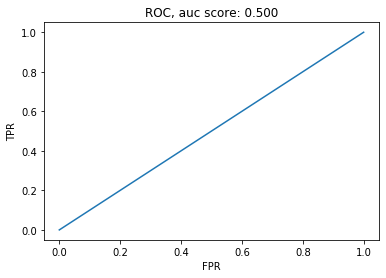

In [51]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, np.ones_like(y_test) * 0.5)
plt.plot(fpr, tpr)
auc = metrics.auc(fpr, tpr)
plt.title("ROC, auc score: %.3f" % auc )
plt.xlabel("FPR")
plt.ylabel("TPR")

Text(0, 0.5, 'TPR')

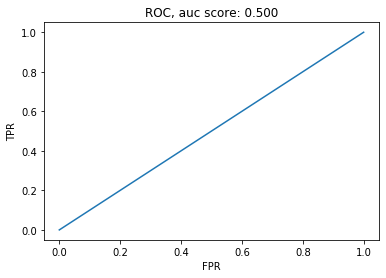

In [52]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, np.ones_like(y_test) * 0.0)
plt.plot(fpr, tpr)
auc = metrics.auc(fpr, tpr)
plt.title("ROC, auc score: %.3f" % auc )
plt.xlabel("FPR")
plt.ylabel("TPR")

Text(0, 0.5, 'TPR')

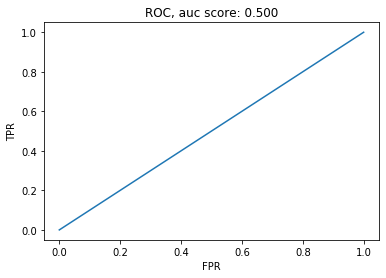

In [53]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, np.ones_like(y_test) * 1.0)
plt.plot(fpr, tpr)
auc = metrics.auc(fpr, tpr)
plt.title("ROC, auc score: %.3f" % auc )
plt.xlabel("FPR")
plt.ylabel("TPR")

Text(0, 0.5, 'TPR')

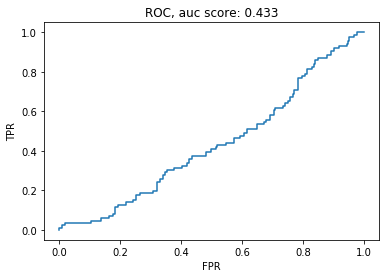

In [54]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, np.random.random(len(y_test)))
plt.plot(fpr, tpr)
auc = metrics.auc(fpr, tpr)
plt.title("ROC, auc score: %.3f" % auc )
plt.xlabel("FPR")
plt.ylabel("TPR")